# Feature Selection

* Also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features for use in model construction
* A feature in case of a dataset simply means a column

* Feature selection can be done in multiple ways but there are broadly 3 categories of it:
  
    * 1. Filter Method
    * 2. Wrapper Method
    * 3. Embedded Method

   

### Top reasons to use feature selection are:

* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

Numerical and Categorical features are to be treated differently.

In [1]:
# imports 

#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical

#### Data

In [2]:
#Loading the dataset
from sklearn.datasets import load_boston
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 1. Filter Method:

* filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.
* plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV.
* e will only select features which has correlation of above 0.5

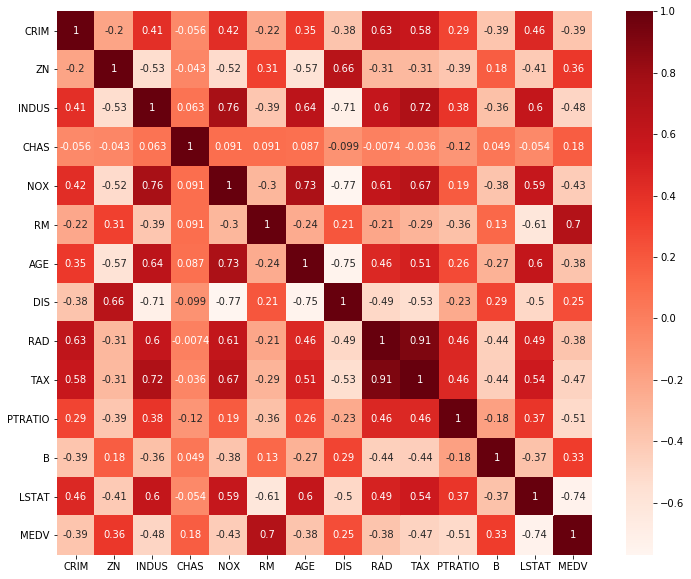

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
cor_target 

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [7]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

* As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV
* One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other.
* if these variables are correlated with each other, then we need to keep only one of them and drop the rest

In [8]:

print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


* RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other.
* We will keep LSTAT since its correlation with MEDV is higher than that of RM.

# 2. Wrapper Method:

* A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria
* This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features
* This is an iterative and computationally expensive process but it is more accurate than the filter method.
* There are different wrapper methods such as Backward Elimination, Forward Selection, Bidirectional Elimination and RFE
         * Backward Elimination
         * Forward Selection
         * Bidirectional Elimination
         * RFE
            
We will discuss Backward Elimination and RFE here.       

## i. Backward Elimination

* we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.
* The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.
* Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [12]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

* As we can see that the variable ‘AGE’ has highest pvalue of 0.9582293 which is greater than 0.05. Hence we will remove this feature and build the model once again.

* Hence we will remove this feature and build the model once again.

* This is an iterative process and can be performed at once with the help of loop.

In [13]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


## ii. RFE (Recursive Feature Elimination)

* It uses accuracy metric to rank the feature according to their importance
* The RFE method takes the model to be used and the number of required features as input.
* It then gives the ranking of all the variables, 1 being most important. 
* It also gives its support, True being relevant feature and False being irrelevant feature

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.

In [16]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


the optimum number of features is 10. We now feed 10 as number of features to RFE and get the final set of features given by RFE method, as follows:

In [17]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


# 3. Embedded Method

* Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.
* Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
* If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [18]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [19]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

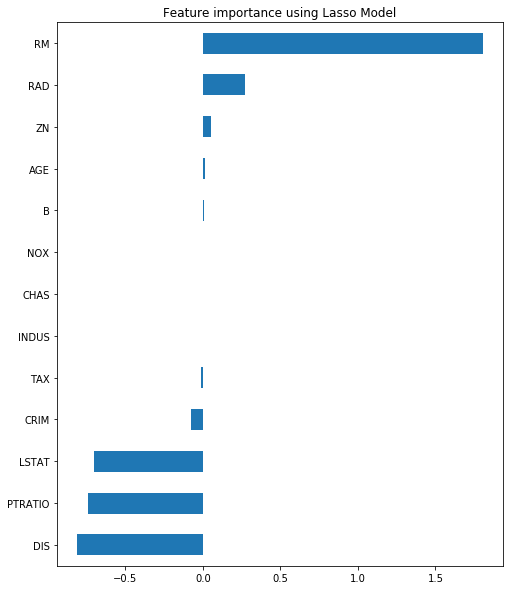

In [20]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken all the features except NOX, CHAS and INDUS.

# NB

* Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.
* Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20).

# Categorical Feature 

### Chi-Square Test of Independence

* The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables.
* Chi-Square Test of Independence is a hypothesis testing test with 2 hypotheses present; the Null Hypothesis and the Alternative Hypothesis. The hypothesis is written below.
      * Null Hypothesis (H0): There is no relationship between the variables
      * Aternative Hypothesis (H1): There is a relationship between variables
      
* we test it against our chosen p-value (often it is 0.05). If the p-value is significant, we can reject the null hypothesis and claim that the findings support the alternative hypothesis. 

In [23]:
# data https://www.kaggle.com/burak3ergun/loan-data-set
import pandas as pd
loan = pd.read_csv('loan_data_set.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
#Transform the numerical feature into categorical feature
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')

In [28]:
loan['Credit_History'] = loan['Credit_History'].astype('object')

In [29]:
#Dropping all the null value
loan.dropna(inplace = True)

In [31]:
#Getting all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude = 'number').drop('Loan_Status', axis = 1).columns
loan.info()
categorical_columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    object 
 10  Credit_History     480 non-null    object 
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 52.5+ KB


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In the Chi-Square test, we display the data in a cross-tabulation (contingency) format with each row representing a level (group) for one variable and each column representing a level (group) for another variable. Let’s try to create a cross-tabulation table between Gender and Loan_Status columns.

In [32]:
pd.crosstab(loan['Gender'], loan['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


Now, let’s try to use the Chi-Square test of independence to test the relationship between these 2 features. Luckily python library scipy already contains the test function for us to use.

In [33]:
# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 1.6495637942018446, p-value: 0.19901831142812107


* If we choose our p-value level to 0.05, as the p-value test result is more than 0.05 we fail to reject the Null Hypothesis. 
* Above 0.05 means no relationship

This means, there is no relationship between the Gender and Loan_Status feature based on the Chi-Square test of independence.

In [34]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(loan['Loan_Status'], loan[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

             Column                      Hypothesis
0           Loan_ID  Fail to Reject Null Hypothesis
1            Gender  Fail to Reject Null Hypothesis
2           Married          Reject Null Hypothesis
3        Dependents  Fail to Reject Null Hypothesis
4         Education  Fail to Reject Null Hypothesis
5     Self_Employed  Fail to Reject Null Hypothesis
6  Loan_Amount_Term          Reject Null Hypothesis
7    Credit_History          Reject Null Hypothesis
8     Property_Area          Reject Null Hypothesis


### Post Hoc Testing

we need to regroup the features for each test to where it is one category class against the rest. To do this, we could apply OneHotEncoding to each class and create a new cross-tab table against the other feature.

In [36]:
property_dummies = pd.get_dummies(data = loan[['Property_Area', 'Loan_Status']], columns = ['Property_Area'])

In [37]:
property_dummies

,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,N,1,0,0
2,Y,0,0,1
3,Y,0,0,1
4,Y,0,0,1
5,Y,0,0,1
...,...,...,...,...
609,Y,1,0,0
610,Y,1,0,0
611,Y,0,0,1
612,Y,0,0,1


In [38]:
#Example
pd.crosstab(property_dummies['Loan_Status'], property_dummies['Property_Area_Rural'])

Property_Area_Rural,0,1
Loan_Status,,
N,94,54
Y,247,85


In [39]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(loan[i])
    bon_p_value = 0.05/loan[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(loan['Loan_Status'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,Married-No,Reject Null Hypothesis
1,Married-Yes,Reject Null Hypothesis
2,Loan_Amount_Term-36.0,Fail to Reject Null Hypothesis
3,Loan_Amount_Term-60.0,Fail to Reject Null Hypothesis
4,Loan_Amount_Term-84.0,Fail to Reject Null Hypothesis
5,Loan_Amount_Term-120.0,Fail to Reject Null Hypothesis
6,Loan_Amount_Term-180.0,Fail to Reject Null Hypothesis
7,Loan_Amount_Term-240.0,Fail to Reject Null Hypothesis
8,Loan_Amount_Term-300.0,Fail to Reject Null Hypothesis
9,Loan_Amount_Term-360.0,Fail to Reject Null Hypothesis


In [ ]:
loan status vs gender 

 loan status                male female 